In [1]:
from ECG.ecg import read_ecg,make_df_summary,make_ecg_res_summary
import os
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')


# file  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"../a01.dat")
# filer  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"../a01r.dat")

file  =  "a01.dat"
filer  ="a01r.dat"

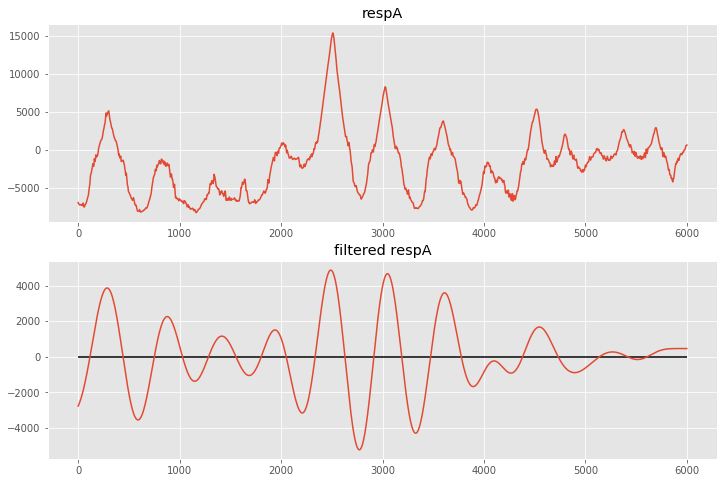

In [2]:
from ECG.ecg import read_ecg
from ECG.ecg_sig import butter_highpass_filter,butter_lowpass_filter
import os
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

events = 6000
eventsr = 4*events
# file  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"a01.dat")
# filer  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"a01r.dat")
y = read_ecg(file,0,events)
yr = read_ecg(filer,0,eventsr)

respA = yr[1::4]

fps = 100

Filtered = butter_highpass_filter(respA,0.1,fps)
Filtered = butter_lowpass_filter(Filtered,0.2,fps)

# Filtered = butter_lowpass_filter(respA,1/2,fps)

plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(range(len(respA)),respA)
plt.title('respA')
plt.subplot(212)
plt.plot(range(len(Filtered)),Filtered)
plt.title('filtered respA')
plt.hlines(y=0,xmin = 0,xmax=events)



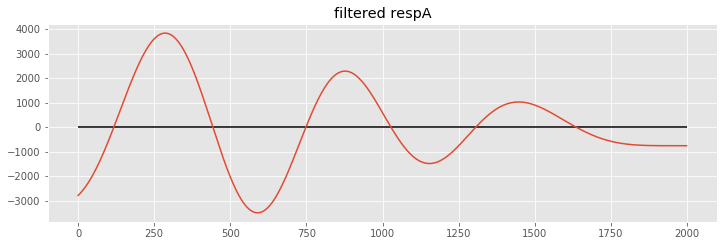

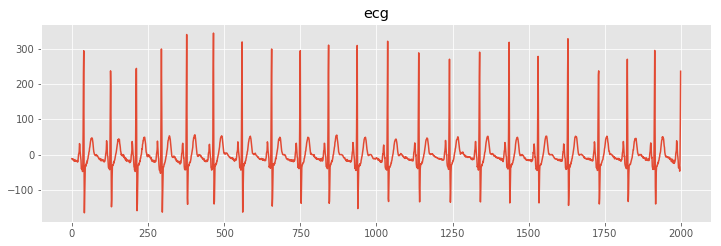

In [3]:
from ECG.ecg import read_ecg
from ECG.ecg_sig import butter_highpass_filter,butter_lowpass_filter
import os
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

events = 2000
eventsr = 4*events
# file  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"a01.dat")
# filer  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"a01r.dat")
y = read_ecg(file,0,events)
yr = read_ecg(filer,0,eventsr)

respA = yr[1::4]

fps = 100

Filtered = butter_highpass_filter(respA,0.1,fps)
Filtered = butter_lowpass_filter(Filtered,0.2,fps)

# Filtered = butter_lowpass_filter(respA,1/2,fps)

plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(range(len(Filtered)),Filtered)
plt.title('filtered respA')
plt.hlines(y=0,xmin = 0,xmax=events)

plt.figure(figsize=(12,8))
plt.subplot(212)
plt.plot(range(len(y)),y)
plt.title('ecg')
plt.show()

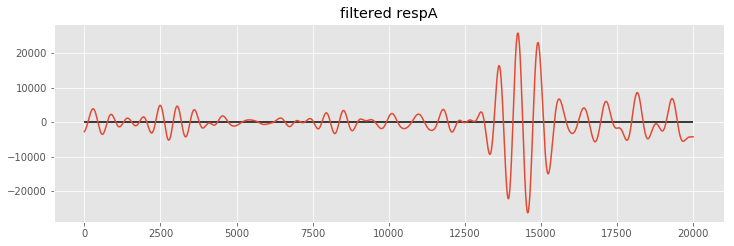

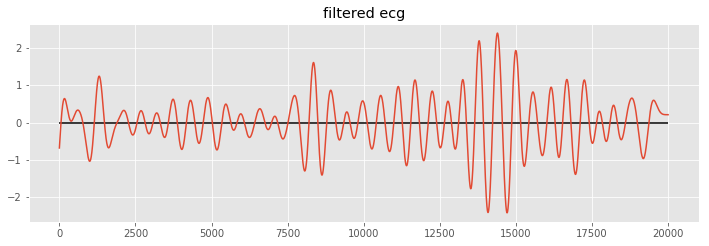

corr is 


In [4]:
# last minute idea


from ECG.ecg import read_ecg
from ECG.ecg_sig import butter_highpass_filter,butter_lowpass_filter
import os
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

events = 20000
eventsr = 4*events
# file  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"a01.dat")
# filer  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"a01r.dat")
y = read_ecg(file,0,events)
yr = read_ecg(filer,0,eventsr)

respA = yr[1::4]

fps = 100

Filteredr = butter_highpass_filter(respA,0.1,fps)
Filteredr = butter_lowpass_filter(Filteredr,0.2,fps)

Filterede = butter_highpass_filter(y,0.1,fps)
Filterede = butter_lowpass_filter(Filterede,0.2,fps)
# Filtered = butter_lowpass_filter(respA,1/2,fps)

plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(range(len(Filteredr)),Filteredr)
plt.title('filtered respA')
plt.hlines(y=0,xmin = 0,xmax=events)

plt.figure(figsize=(12,8))
plt.subplot(212)
plt.plot(range(len(Filterede)),Filterede)
plt.title('filtered ecg')
plt.hlines(y=0,xmin = 0,xmax=events)
plt.show()

print(f"corr is ")

In [5]:
np.corrcoef(Filteredr,Filterede)
# fix the lag

array([[1.        , 0.05193847],
       [0.05193847, 1.        ]])

   Offset  Amplitude  T (sec)    DT  DAmplitude  respA  respA_filtered
0      39      294.0     0.39  0.00         0.0  -7264    -2126.868767
1     127      237.0     1.27  0.88       -57.0  -3066      345.933855
2     212      244.0     2.12  0.85         7.0    738     2927.813231
3     294      299.0     2.94  0.82        55.0   4917     3854.714269
4     377      340.0     3.77  0.83        41.0   1027     2364.829541


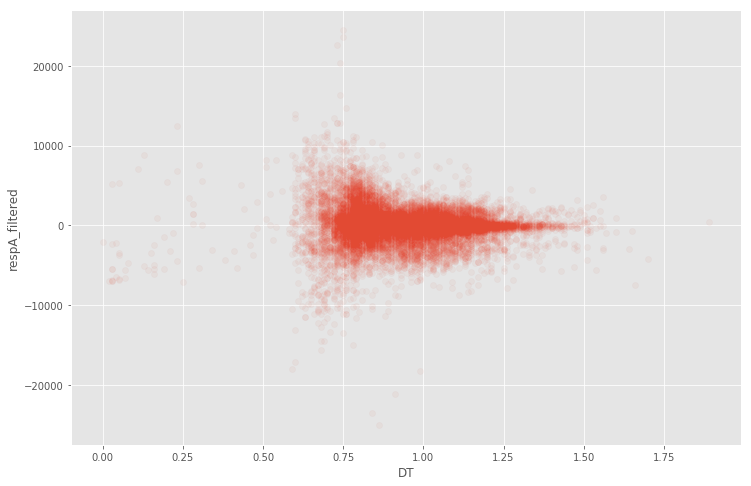

In [6]:
events = 2000000
eventsr = 4*events
df = make_ecg_res_summary(file,filer,0,events)
print(df.head())

plt.figure(figsize=(12,8))
plt.scatter(x=df["DT"],y=df["respA_filtered"],alpha=0.05)
plt.xlabel("DT")
plt.ylabel("respA_filtered")
plt.show()


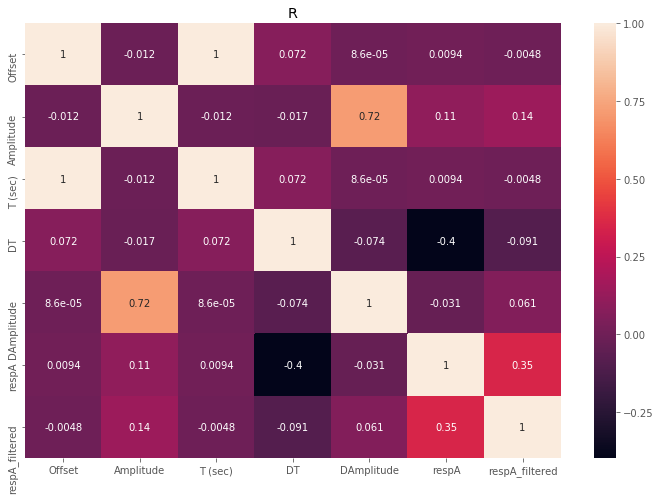

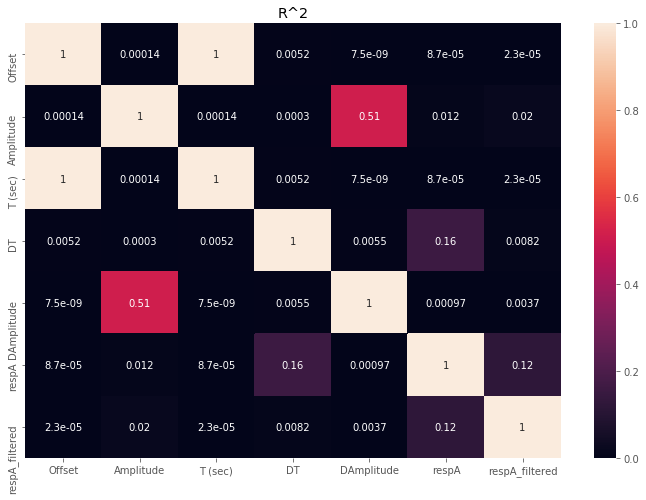

In [7]:
from ECG.ecg import read_ecg,make_df_summary,make_ecg_res_summary
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

events = 1000000
eventsr = 4*events
# file  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"../a01.dat")
# filer  =  os.path.join(os.path.dirname(os.path.realpath(__file__)),"../a01r.dat")

df = make_ecg_res_summary(file,filer,0,events)


# sns.pairplot(df)

corr_matrix = df.corr()
corr_matrix_sq = df.corr()**2
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)
plt.title("R")
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix_sq,annot=True)
plt.title("R^2")
plt.show()
